Name: Seán Kendall

Student Number: 20355246

# REGRESSION AND CLASSIFICATION

### Part A: Regression Analysis

#### Question 1: Polynomial Regression

In [123]:
# importing packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

(a)

1.

In [124]:
df = pd.read_csv("AutoMpg.csv")
df.head(5)

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,1.0,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,1.0,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,1.0,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,1.0,ford torino


In [125]:
df.shape

(402, 9)

In [126]:
df.dtypes

horsepower      float64
mpg             float64
cylinders         int64
displacement    float64
weight            int64
acceleration    float64
model year        int64
origin          float64
car name         object
dtype: object

Fill in missing values:

In [127]:
print(df.isna().sum())

horsepower      16
mpg              0
cylinders        0
displacement     0
weight           0
acceleration     0
model year       0
origin          15
car name         0
dtype: int64


Only the features "horsepower" and "origin" have missing values.

Imputing missing values:

In [128]:
numeric_columns = df.drop(columns=["car name"])
numeric_columns.head()

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,130.0,18.0,8,307.0,3504,12.0,70,1.0
1,165.0,15.0,8,350.0,3693,11.5,70,1.0
2,150.0,18.0,8,318.0,3436,11.0,70,1.0
3,150.0,16.0,8,304.0,3433,12.0,70,1.0
4,140.0,17.0,8,302.0,3449,10.5,70,1.0


Using KNNImputer to fill in the missing values:

In [129]:
knn_imputer = KNNImputer()
imputed_numeric_data = knn_imputer.fit_transform(numeric_columns)
imputed_df = pd.DataFrame(imputed_numeric_data, columns=numeric_columns.columns)

In [130]:
df["horsepower"] = imputed_df["horsepower"]
df["origin"] = imputed_df["origin"]

In [131]:
print(df.isna().sum())

horsepower      0
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Above you can see that there are now no missing values in any column.

Replace the outliers:

Below is a function which uses the IQR to identify outliers and then replace them with lower bound and upper bound values.

In [132]:
def replace_outliers(column):
    q1 = df[column.name].quantile(0.25)
    q3 = df[column.name].quantile(0.75)
    iqr = q3 - q1

    lower = q1-1.5*iqr
    upper = q3+1.5*iqr

    df.loc[df[column.name] < lower, column.name] = lower
    df.loc[df[column.name] > upper, column.name] = upper

Here is a boxplot of the "horsepower" column:

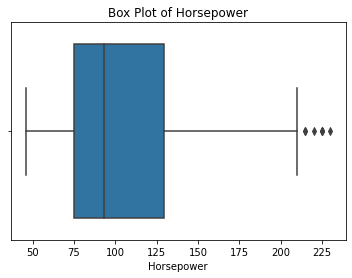

In [133]:
sns.boxplot(x=df["horsepower"])
plt.xlabel("Horsepower")
plt.title("Box Plot of Horsepower")
plt.show()

On the right there are a number of outliers past the 200 mark.

Below I run my function on the "horsepower" column and it removes the outliers.

In [134]:
replace_outliers(df["horsepower"])

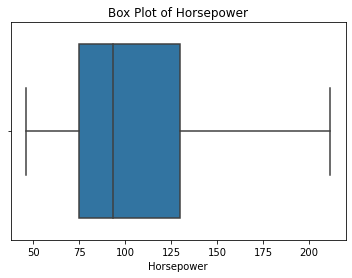

In [135]:
sns.boxplot(x=df["horsepower"])
plt.xlabel("Horsepower")
plt.title("Box Plot of Horsepower")
plt.show()

Above you can see there are no longer any outliers in the display.

I will apply this function to the rest of the features:

In [136]:
for column in df.columns[:-1]:
    replace_outliers(df[column])

Removing duplicate rows:

In [137]:
print("Number of rows in df:", df.shape[0])
print("Number of columns in df:", df.shape[1])

Number of rows in df: 402
Number of columns in df: 9


In [138]:
df = df.drop_duplicates(keep=False)
print("Number of rows in df:", df.shape[0])
print("Number of columns in df:", df.shape[1])

Number of rows in df: 394
Number of columns in df: 9


It can be seen duplicated rows have been removed.